# <center>ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

## Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

HR-агентство хочет получить ответы на следующие вопросы:

- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Какие факторы влияют на зарплату у специалистов Data Scientist?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Данные содержат следующие столбцы:
* *work_year* - Год, в котором была выплачена зарплата;
* *experience_level* - 	Опыт работы на этой должности в течение года со следующими возможными значениями (EN — Entry-level/Junior, MI — Mid-level/Intermediate, SE — Senior-level/Expert, EX — Executive-level/Director);
* *employment_type* - Тип трудоустройства для этой роли (PT — неполный рабочий день, FT — полный рабочий день, CT — контракт, FL — фриланс);
* *job_title* - Роль, в которой соискатель работал в течение года;
* *salary* - Общая выплаченная валовая сумма заработной платы;
* *salary_currency* - Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217;
* *salary_in_usd* - Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com);
* *employee_residence* - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166;
* *remote_ratio* - 	Общий объём работы, выполняемой удалённо. Возможные значения: 0 — удалённой работы нет (менее 20 %), 50 — частично удалённая работа, 100 — полностью удалённая работа (более 80 %);
* *company_location* - Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
* *company_size* - 	Среднее количество людей, работавших в компании в течение года (S — менее 50 сотрудников (небольшая компания), M — от 50 до 250 сотрудников (средняя компания), L — более 250 сотрудников (крупная компания)).

Источник датасета: [“Data Science Job Salaries” (kaggle.com)](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)


## Загрузка данных

In [859]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

In [860]:
# загружаем датасет
data = pd.read_csv('ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [861]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [862]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В датасете 607 записей (без пропущенных значений), 5 количественных и 7 категориальных признаков. В данных есть неиформативные признаки такие, как: "Unnamed", а также "salary" и "salary_currency", поскольку у нас есть признак "salary_in_usd", который отражает з/п в долларах, удалим их

In [863]:
data = data.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis=1)
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


Проверим данные на наличие полных дубликатов:

In [864]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 42
Размер таблицы после удаления дубликатов: (565, 9)


Продолжаем подготовку данных для дальнейшего анализа. Часть категориальных признаков содержат сокращенные значения, для удобства и лучшего понимания изменим их на их полные названия.

In [ ]:
# изменим названия стран с ISO2 на оригинальные названия с помощью пакета country_converter библиотеки Python
# установка: pip install country_converter --upgrade
# в данных два признака, содержащие названия стран: "company_location" и "employee_residence"
import country_converter
coco = country_converter.CountryConverter()
data['company_location'] = coco.convert(data['company_location'], to='name_short')
data['employee_residence'] = coco.convert(data['employee_residence'], to='name_short')


In [866]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,Germany,0,Germany,L
1,2020,SE,FT,Machine Learning Scientist,260000,Japan,0,Japan,S
2,2020,SE,FT,Big Data Engineer,109024,United Kingdom,50,United Kingdom,M
3,2020,MI,FT,Product Data Analyst,20000,Honduras,0,Honduras,S
4,2020,SE,FT,Machine Learning Engineer,150000,United States,50,United States,L


Поскольку дальше нам предстоить строить графики, и чтобы они были читаемые и легко воспринимались, преобразуем значения некоторых признаков в полные названия

In [ ]:
data['experience_level'] = data['experience_level'].replace(['EN', 'MI', 'SE', 'EX'], ['Junior', 'Middle', 'Senior', 'Director'])
data['employment_type'] = data['employment_type'].replace(['PT', 'FT', 'CT', 'FL'], ['Partly full', 'Full', 'Contract', 'Freelance'])
data['remote_ratio'] = data['remote_ratio']. replace([0, 50, 100],['Completely not remote', 'Partly Remote', 'Fully Remote'])
# признак "remote_ratio" был количественным, необходимо преобразовать его в категориальный 
data['remote_ratio'] = data['remote_ratio'].astype(object)
data['company_size'] = data['company_size'].replace(['S', 'M', 'L'], ['Small', 'Medium', 'Large'])

In [868]:
#посмотрим, как теперь выглядят наши данные
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Middle,Full,Data Scientist,79833,Germany,Completely not remote,Germany,Large
1,2020,Senior,Full,Machine Learning Scientist,260000,Japan,Completely not remote,Japan,Small
2,2020,Senior,Full,Big Data Engineer,109024,United Kingdom,Partly Remote,United Kingdom,Medium
3,2020,Middle,Full,Product Data Analyst,20000,Honduras,Completely not remote,Honduras,Small
4,2020,Senior,Full,Machine Learning Engineer,150000,United States,Partly Remote,United States,Large


<AxesSubplot: >

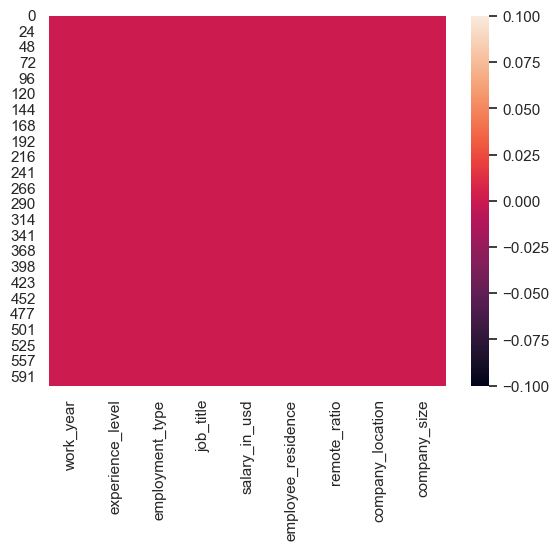

In [869]:
#Проверим данные на наличие пропусков
sns.heatmap(data.isnull()) # убеждаемся, что набор данных без пропусков

# Разведовательный анализ данных

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер заработной платы для Data Scientist не отличается в разных регионах

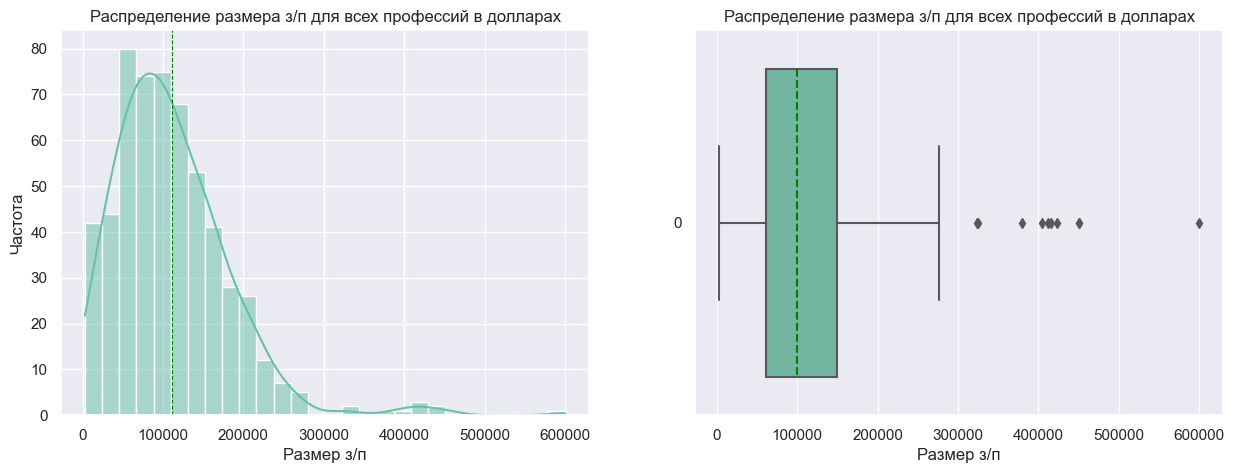

In [870]:
#Сначала проведем некоторый визуальный анализ данных,рассмотрим распределение зарплаты по всем профессиям, как она распределяется 
#с точки зрения количественных наблюдений, для этого построим гистрограмму и диаграмму boxplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер з/п', ylabel='Частота')
axes[0].set_title('Распределение размера з/п для всех профессий в долларах')
axes[0].axvline(data['salary_in_usd'].mean(), color='green', linestyle='--', linewidth=0.8)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "green", "linestyle": '--'})
axes[1].set(xlabel='Размер з/п')
axes[1].set_title('Распределение размера з/п для всех профессий в долларах')

plt.show()

In [871]:
#также посмотрим на числовые характеристики 
data_optionally = data['salary_in_usd'].describe().to_frame()
data_optionally.columns = ['Размер зарплаты']
data_optionally

,Размер зарплаты
count,565.000000
mean,110610.343363
std,72280.702792
min,2859.000000
25%,60757.000000
50%,100000.000000
75%,150000.000000
max,600000.000000


Медиана и среднее значение практически совпадают. Распределение размера зарплаты похоже на нормальное, имеется небольшое количество выбросов.

### Размер заработной платы в зависимости от профессии

In [872]:
count_ds = data['job_title'].value_counts()[:10]
count_ds

Data Scientist                130
Data Engineer                 121
Data Analyst                   82
Machine Learning Engineer      39
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: job_title, dtype: int64

Text(0, 0.5, 'Год')

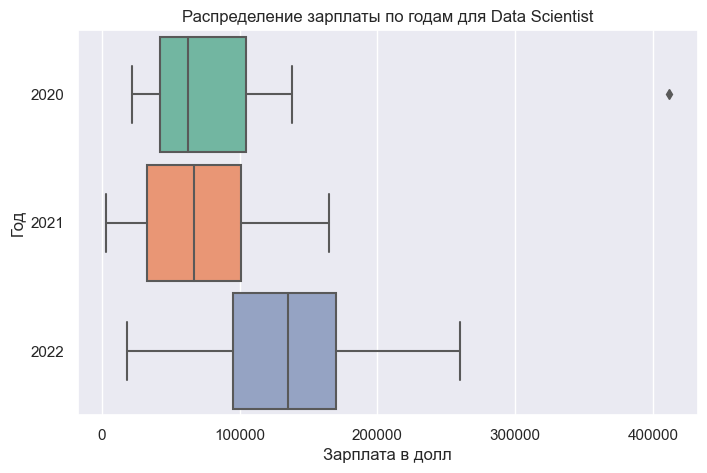

In [873]:
#Теперь с помощью визуализации ответим на вопрос, как меняется заработная плата непосредственно для Data Scientist
#Построим столбчатую диаграмму, которая отражает среднее значение по столбцу 
data_ds = data[(data['job_title'] == 'Data Scientist')]
fig = plt.figure(figsize=(8,5))
boxplot = sns.boxplot(
    data=data_ds,
    y='work_year',
    x='salary_in_usd',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение зарплаты по годам для Data Scientist');
boxplot.set_xlabel('Зарплата в долл')
boxplot.set_ylabel('Год')

Визуализация наглядно демонстрирует, что разброс з/п за 2022 год имеет больший разброс по сравнению с предыдущими годами, в этот год наблюдается больший межквартильный размах, соответственно в 2022 Data Scientist зарабатывали больше, чем в период с 2020 по 21 гг. Медианы 2021 и 2020 практически одинаковы. 

In [874]:
#Также мы наблюдаем один выпрос в з/п, который соответствует 412000 долларов, который впрочем имеет место быть.
data_ds[data_ds['salary_in_usd'] == 412000]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
63,2020,Senior,Full,Data Scientist,412000,United States,Fully Remote,United States,Large


In [875]:
#смотрим числовые характеристики
data_count = data_ds.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Заработная плата по годам')
data_count

Заработная плата по годам


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.52,81436.65,21669.0,42197.00,62726.0,105000.00,412000.0
2021,44.0,70215.77,45843.82,2859.0,32793.75,67233.5,100922.75,165000.0
2022,65.0,131366.94,55785.24,18442.0,95550.00,135000.0,170000.00,260000.0


На первый взгляд мы можем сказать, что для DS наблюдается ежегодный рост з/п, но чтобы достоверно ответить справедливо ли данное утверждение необходимо провести статистические тесты.

## Какие факторы влияют на зарплату у специалистов Data Scientist?

Для того, чтобы понять какие факторы влияют больше всего на заработную плату Data Scientist, сделаем базовый анализ каждого признака и постороим соответствующую визуализацию

In [876]:
#Начнем с категориального признака experience_level - Опыт работы на должности, который представлен четырьмя возможными значениями
experience_level = data['experience_level'].value_counts()
experience_level

Senior      243
Middle      208
Junior       88
Director     26
Name: experience_level, dtype: int64

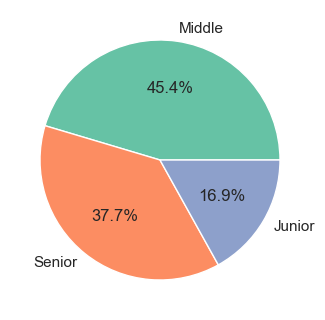

In [877]:
#Теперь посмотрим как этот параметр представлен для DS 
experience_ds = data_ds['experience_level'].value_counts()
fig = plt.figure(figsize=(3,3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    experience_ds,
    labels=experience_ds.index,
    autopct='%.1f%%'
);

Text(0, 0.5, 'опыт работы')

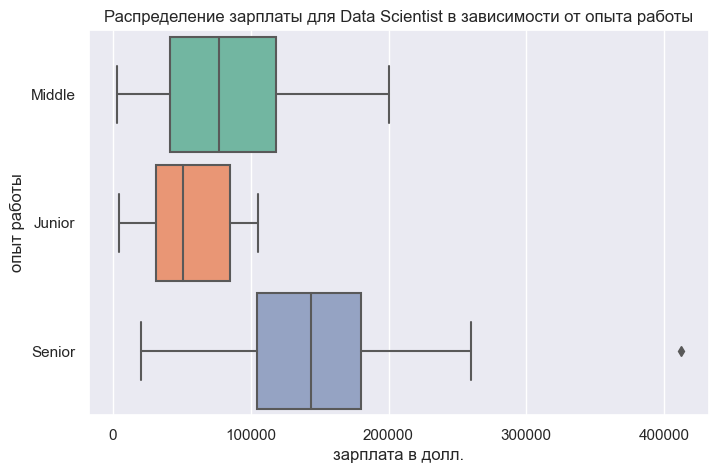

In [878]:

fig = plt.figure(figsize=(8,5))
boxplot = sns.boxplot(
    data=data_ds,
    y='experience_level',
    x='salary_in_usd',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение зарплаты для Data Scientist в зависимости от опыта работы');
boxplot.set_xlabel('зарплата в долл.')
boxplot.set_ylabel('опыт работы')

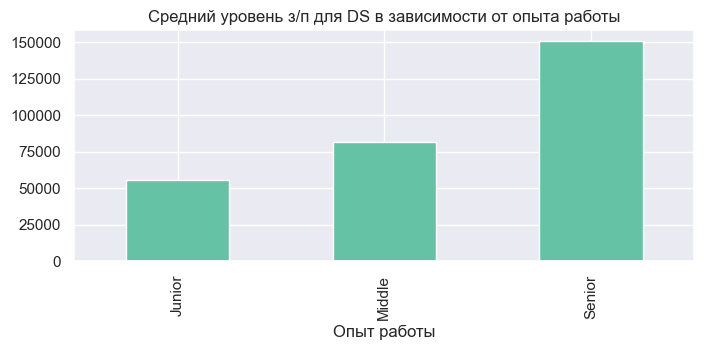

In [879]:
df = data_ds.groupby(['experience_level'])['salary_in_usd'].mean()
df.plot(
    kind='bar',
    grid=True,
    figsize=(8, 3),
    title='Средний уровень з/п для DS в зависимости от опыта работы',
    xlabel='Опыт работы'
);

Во-первых, хочется отметить, что в данном наборе данных нет ни одного Data Scientist на позиции Director. Во-вторых, судя по визуализации, для определения уровня з/п признак "опыт работы" является значимым, что в принципе является закономерным фактом. Интересно посмотреть, а как менялась з/п DS в зависимости от опыта и года работы.

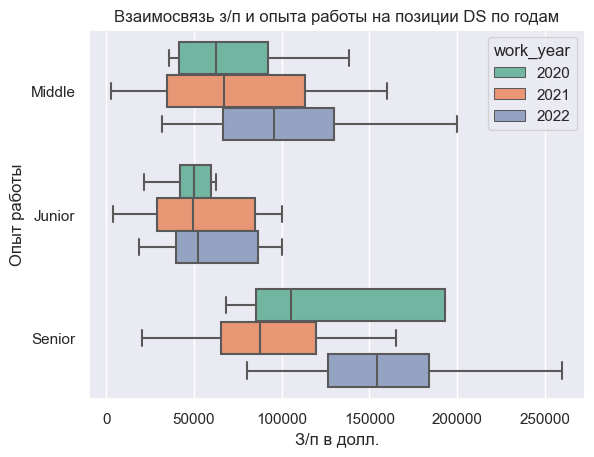

In [880]:
sns.boxplot(x=data_ds['salary_in_usd'],
             y=data_ds['experience_level'], 
             hue=data_ds['work_year'],
             showfliers = False)   
plt.title('Взаимосвязь з/п и опыта работы на позиции DS по годам');
plt.xlabel('З/п в долл.');
plt.ylabel('Опыт работы');

У начинающего специалиста медианы за все 3 года практически совпадают, за 21-22 гг особых изменений в з/п нет. У Middle специалиста с каждым годом растет и медиана, и среднее, и разброс, в отличии от Senior, для которого  2021 г был явно не самым лучшим. Поэтому оставляем признак work_year, как значимый.

In [881]:
#Теперь перейдем к признаку employment_type - тип трудоустройства.
data['employment_type'].value_counts()

Full           546
Partly full     10
Contract         5
Freelance        4
Name: employment_type, dtype: int64

Text(0, 0.5, 'частота')

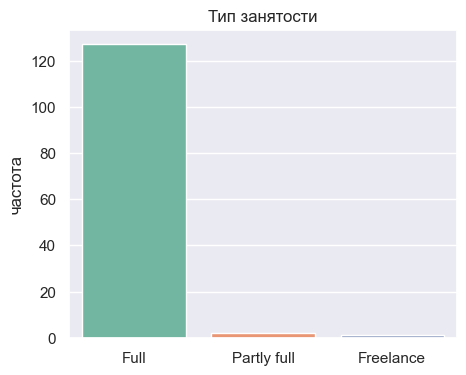

In [882]:
#Смотрим для DS
employment_type = data_ds['employment_type'].value_counts()
fig = plt.figure(figsize=(5,4))
barplot = sns.barplot(
    x=employment_type.index,
    y= employment_type.values,
    orient='v'
)
barplot.set_title('Тип занятости');
barplot.set_ylabel('частота')

Text(0, 0.5, 'Тип трудоустройства')

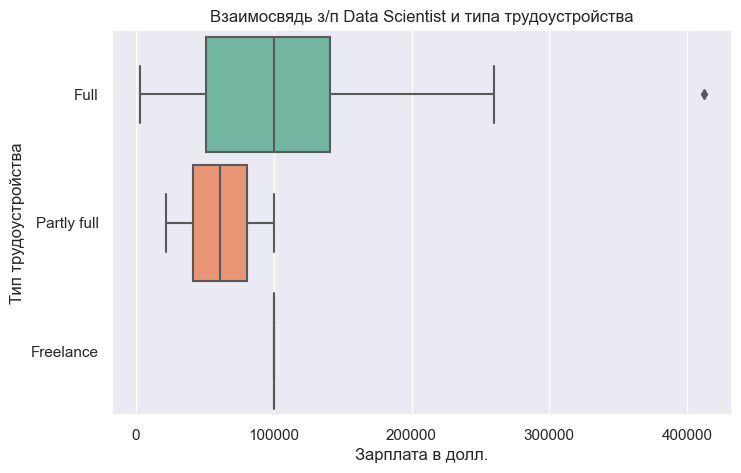

In [883]:
fig = plt.figure(figsize=(8,5))
boxplot = sns.boxplot(
    data=data_ds,
    y='employment_type',
    x='salary_in_usd',
    orient='h',
    width=0.9
)
boxplot.set_title('Взаимосвядь з/п Data Scientist и типа трудоустройства');
boxplot.set_xlabel('Зарплата в долл.')
boxplot.set_ylabel('Тип трудоустройства')

Мы видим, что практически 98% рабочих мест приходятся на полный рабочий день DS. Работа на неполный рабочий день и фриланс встречаются крайне редко, а работе по контракту для DS вообще не предусмотрена.

In [884]:
# Посчитаем среднюю заработная плата сотрудников DS с различными типами работы
salary_ds = data_ds.groupby('remote_ratio')['salary_in_usd'].mean().sort_values()
salary_ds

remote_ratio
Partly Remote             73827.833333
Completely not remote     98444.973684
Fully Remote             116484.544118
Name: salary_in_usd, dtype: float64

Text(0, 0.5, 'Зарплата в долл.')

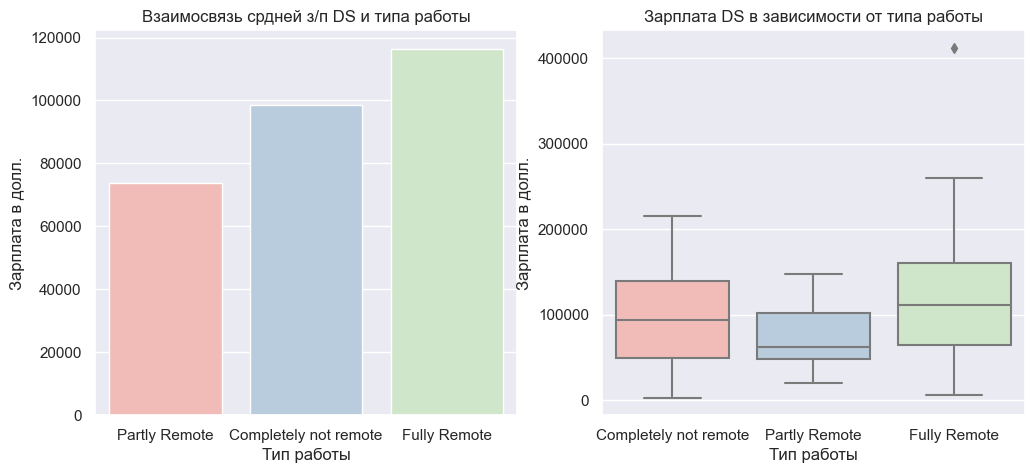

In [885]:
plt.figure(figsize=(12, 5))
sns.set_palette('Pastel1')

plt.subplot(1, 2, 1)
ax = sns.barplot(data=data_ds,
                 x=salary_ds.index, 
                 y=salary_ds
                 )
ax.set_title('Взаимосвязь срдней з/п DS и типа работы')
ax.set_xlabel('Тип работы')
ax.set_ylabel('Зарплата в долл.')

plt.subplot(1, 2, 2)
ax = sns.boxplot(data=data_ds, 
                 x='remote_ratio',
                 y='salary_in_usd')
ax.set_title('Зарплата DS в зависимости от типа работы')
ax.set_xlabel('Тип работы')
ax.set_ylabel('Зарплата в долл.')

Мы видим, что специалисты DS, работающие удаленно, имеют более высокую среднюю зарплату (чуть менее 120 т долл.), чем те, кто работает на месте (чуть менее 100 т долл.), а те, кто работает частично удаленно имеют самую низкую среднюю з/п - менее 80 т долл.

In [886]:
#Посмротрим есть ли какая то взаимосвязь между средней з/п DS и типом работы, а также годом, за который предоставлен наш набор данных
remote_by_year = data_ds.groupby(['work_year','remote_ratio'])['salary_in_usd'].mean().sort_values(ascending=False)
remote_by_year = remote_by_year.reset_index()
remote_by_year

,work_year,remote_ratio,salary_in_usd
0,2022,Fully Remote,136777.666667
1,2022,Completely not remote,125742.458333
2,2020,Fully Remote,123141.333333
3,2022,Partly Remote,93351.500000
4,2021,Partly Remote,77507.000000
5,2021,Fully Remote,73917.400000
6,2020,Completely not remote,58676.000000
7,2020,Partly Remote,57508.833333
8,2021,Completely not remote,46379.250000


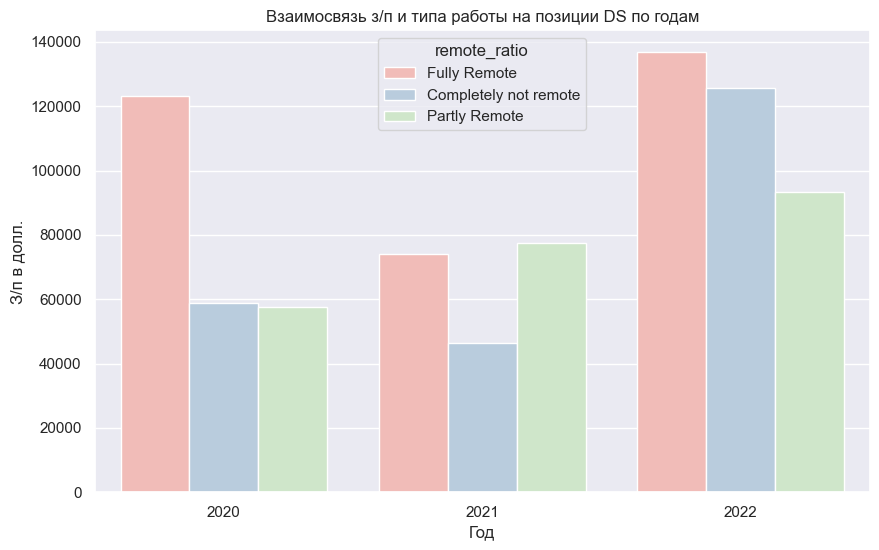

In [887]:
plt.figure(figsize=(10, 6))
sns.barplot(data=remote_by_year,
             x='work_year',
             y='salary_in_usd',
             hue='remote_ratio'
             )   
plt.title('Взаимосвязь з/п и типа работы на позиции DS по годам');
plt.xlabel('Год');
plt.ylabel('З/п в долл.');

И опять мы наблюдаем ту же картину, тип работы несомненно влияет на зарплату Data Scientist, самая высокая средняя з/п принадлежит удаленному типу работы, за исключением 2021 года, в котором явно происходили события, неблагоприятные для специалистом по работе с данными, возможно это были события, связанные с эпидемией Коронавируса, когда массово всех работников отправляли на удаленную работу, но по истечению времени возникла необходимость в работниках на местах, или частично удаленно.

In [888]:
#Ну и наконец, перейдем к признаку, касающийся географии нахождения места работы сотрудника. 
# Посмотрим, где больше всего платят, любопытства ради, сначала по всем профессиям, а затем конкретно DS
top_location_salary = data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)[:5]
top_location_salary 

company_location
Russia           157500.000000
United States    144292.993711
New Zealand      125000.000000
Israel           119059.000000
Japan            114127.333333
Name: salary_in_usd, dtype: float64

In [889]:
top_location_ds = data_ds.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)[:5]
top_location_ds 

company_location
United States     139934.958333
Switzerland       122346.000000
Israel            119059.000000
Algeria           100000.000000
United Kingdom     88177.363636
Name: salary_in_usd, dtype: float64

Интересно, что самую высокую среднюю з/п по всем профессиям платят в России, а вот Datа Scientist в США, видимо в России они не так востребованы.

In [933]:
#Также у нас есть еще признак employee_residence - страна проживания сотрудника
data_ds['employee_residence'].count()
#Всего их 130 

130

Text(0, 0.5, 'Средняя з/п DS в долл.')

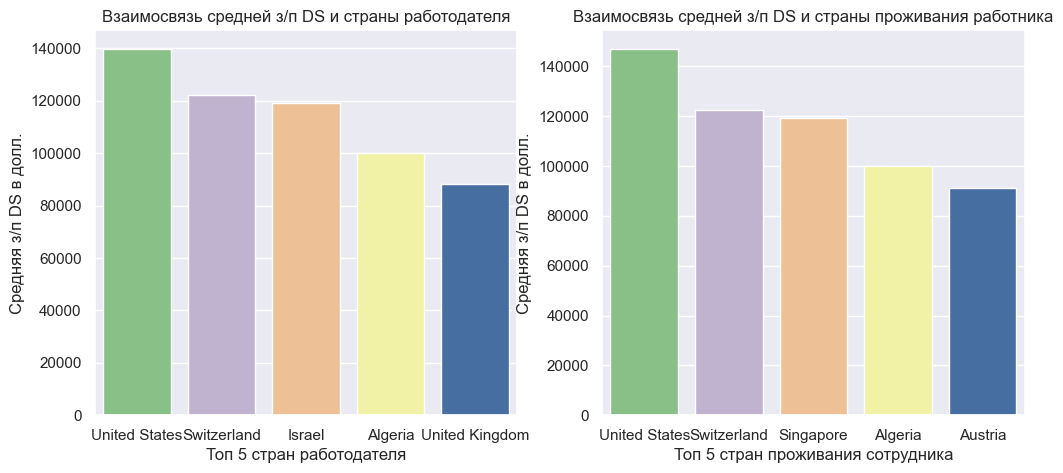

In [891]:
top_residence_ds = data_ds.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False)[:5]

plt.figure(figsize=(12, 5))
sns.set_palette('Accent')

plt.subplot(1, 2, 1)
ax = sns.barplot(data=data_ds,
                 x=top_location_ds.index, 
                 y=top_location_ds 
                 )
ax.set_title('Взаимосвязь средней з/п DS и страны работодателя')
ax.set_xlabel('Топ 5 стран работодателя')
ax.set_ylabel('Средняя з/п DS в долл.')

plt.subplot(1, 2, 2)
ax = sns.barplot(data=data_ds,
                 x=top_residence_ds.index, 
                 y=top_residence_ds 
                 )
ax.set_title('Взаимосвязь средней з/п DS и страны проживания работника')
ax.set_xlabel('Топ 5 стран проживания сотрудника')
ax.set_ylabel('Средняя з/п DS в долл.')


Согласно нашим данным США и Швейцария являются самыми высокооплачиваемыми странами в области науки о данных, где средняя годовая заработная плата составляет 140 000 и чуть более 120000 долл. соответственно.


## Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

In [892]:
#Перейдем к следующему признаку размеру компании, а точнее среднему количеству людей, которые работают в данной компании. 
#Посмотрим какая в среднем з/п у DS в различных компаниях
company_size_ds = data_ds.groupby('company_size')['salary_in_usd'].mean().sort_values()
company_size_ds

company_size
Small      51925.761905
Large     102743.418605
Medium    120080.575758
Name: salary_in_usd, dtype: float64

Text(0, 0.5, 'Размер компании')

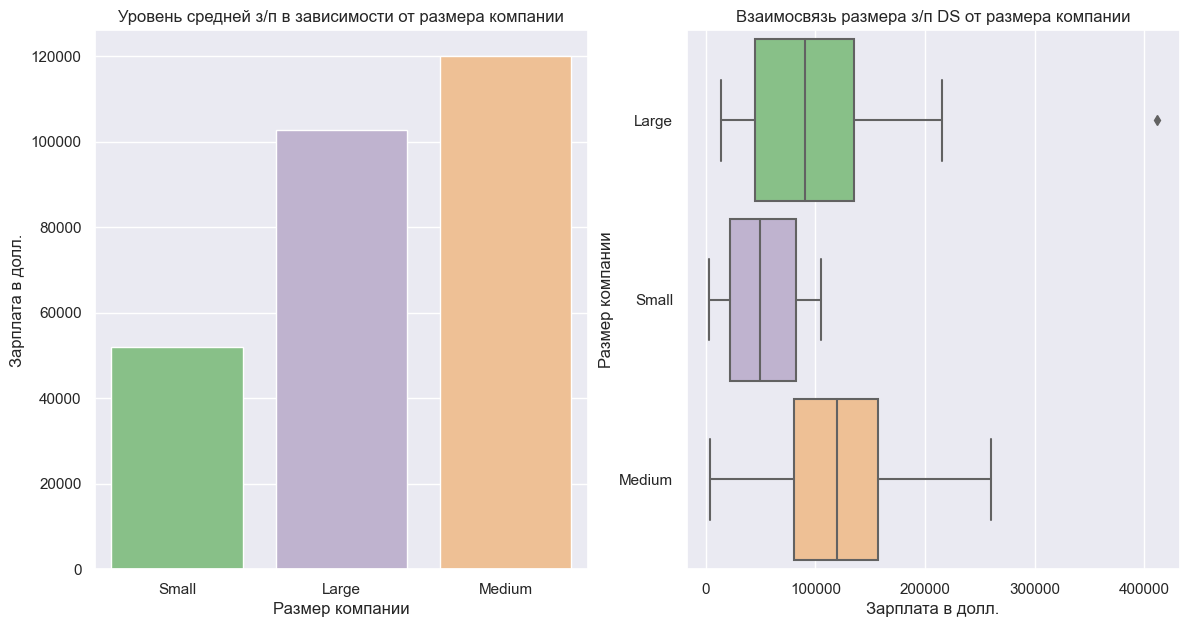

In [893]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
ax = sns.barplot(x=company_size_ds.index, 
                 y=company_size_ds.values,
                 orient='v'
)
ax.set_title('Уровень средней з/п в зависимости от размера компании')
ax.set_xlabel('Размер компании')
ax.set_ylabel('Зарплата в долл.')

plt.subplot(1, 2, 2)
ax = sns.boxplot(
    data=data_ds,
    y='company_size',
    x='salary_in_usd',
    orient='h',
    width=0.9
)
ax.set_title('Взаимосвязь размера з/п DS от размера компании')
ax.set_xlabel('Зарплата в долл.')
ax.set_ylabel('Размер компании')

Визуально напрашивается вывод: самые высокие з/п платят в средних компаниях, численностью от 50 до 250 содрудников. Средняя з/п DS в такой компании составляет 120 т долл, в то время, как в крупных - чуть более 100 т долл. Медианная з/п также больше у средних компаний по сравнению с крупными и небольшими.

Text(0.5, 0, 'Размер компании')

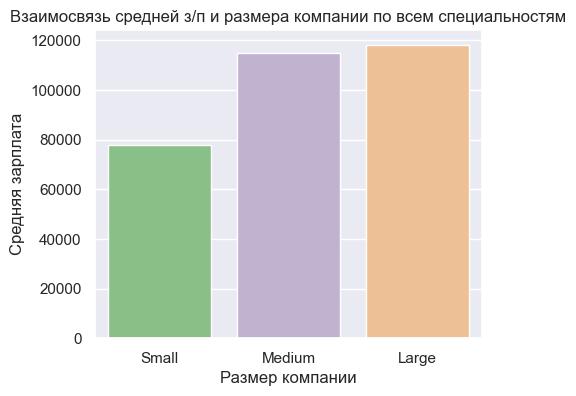

In [894]:
#Для общего понимания посмотрим среднюю з/п сотрудников различных специальностей
company_size = data.groupby('company_size')['salary_in_usd'].mean().sort_values()
fig = plt.figure(figsize=(5,4))
barplot = sns.barplot(
    x=company_size.index,
    y= company_size.values,
    orient='v'
)
barplot.set_title('Взаимосвязь средней з/п и размера компании по всем специальностям');
barplot.set_ylabel('Средняя зарплата')
barplot.set_xlabel('Размер компании')

При анализе данных всех специальностей картина немного другая, с минимальным отрывом средняя з/п больше у крупных компаний (численностью более 250 чел.)

Давайте добавим сюда же еще один признак remote_ratio, и посмотрим какому виду работы компании отдают предпочтение 

Text(0, 0.5, 'Частота')

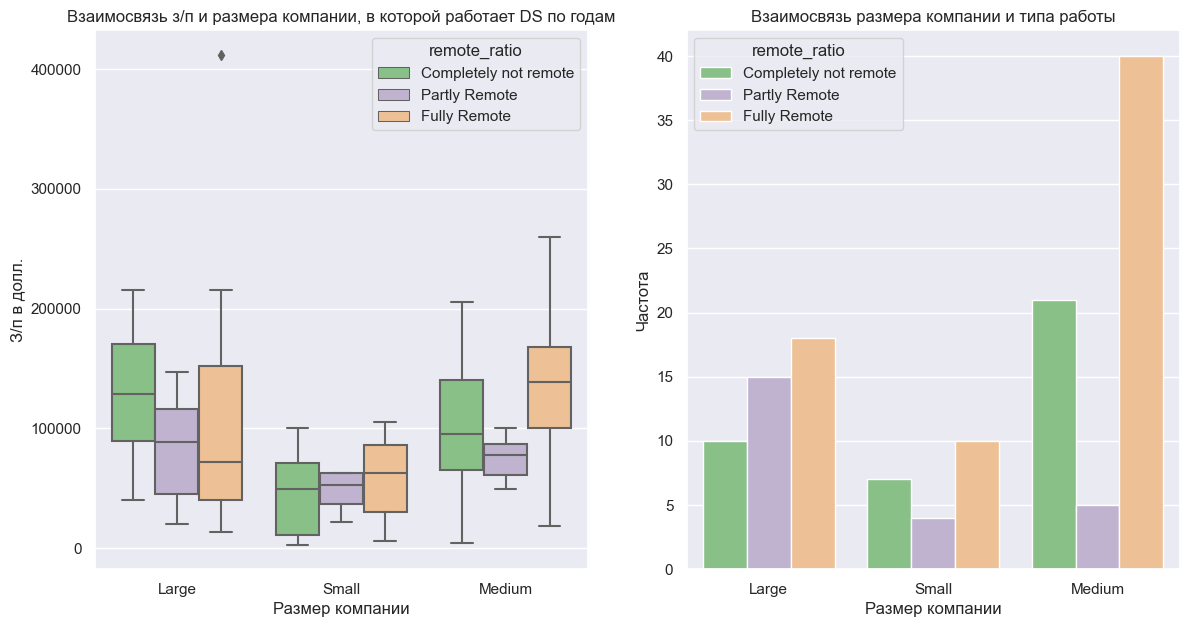

In [895]:
size_company = data_ds['company_size'].value_counts()
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
ax = sns.boxplot(data=data_ds,
             x='company_size',
             y='salary_in_usd',
             hue='remote_ratio'
             ) 
ax.set_title('Взаимосвязь з/п и размера компании, в которой работает DS по годам')
ax.set_xlabel('Размер компании')
ax.set_ylabel('З/п в долл.')

plt.subplot(1, 2, 2)
ax = sns.countplot(data=data_ds,
                 x='company_size',
                 hue='remote_ratio'
)
ax.set_title('Взаимосвязь размера компании и типа работы')
ax.set_xlabel('Размер компании')
ax.set_ylabel('Частота')



Самая низкая зарплата наблюдается при работе в небольшой компании. Первенство самой высокой з/п DS принадлежит полностью удаленной работе в средних компаниях. 
Больше всего возможностей работать удаленно для DS предоставляют средние компании, в то время как небольшие компании дают минимум возможностей для работы на месте или частично удаленно.
Таким образом, на основе визуализации, мы можем сделать вывод: во-первых, з/п специалиста зависит от размера компании, в которой он работает; во-вторых, для Data Scientist предпочтительней средние компании, но эту гипотезу стоит проверить с помощью статистических тестов.

## Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

In [896]:
data['job_title'].value_counts()[:5]

Data Scientist               130
Data Engineer                121
Data Analyst                  82
Machine Learning Engineer     39
Research Scientist            16
Name: job_title, dtype: int64

В нашем наборе данных представлена информация о з/п 130 специалистов Data Scientist и 121 Data Engineer. Пришло время сравнить, какая профессия более привлекательна в разрезе оплаты труда

In [897]:
df = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]
#Посмотрим какая в среднем з/п у DS и DE
different_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values()
different_salary

job_title
Data Scientist    103336.353846
Data Engineer     109750.033058
Name: salary_in_usd, dtype: float64

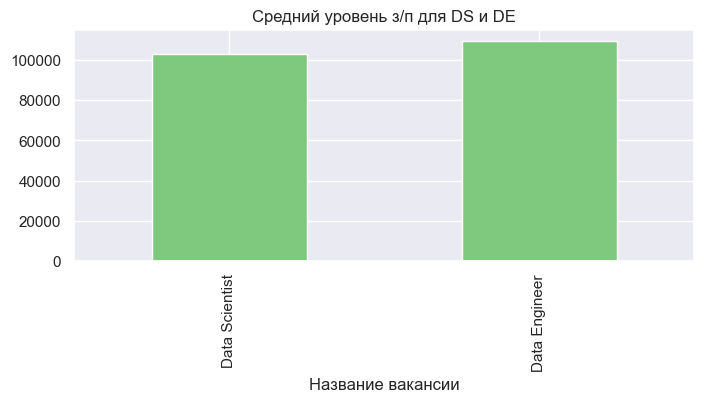

In [898]:
different_salary.plot(
    kind='bar',
    grid=True,
    figsize=(8, 3),
    title='Средний уровень з/п для DS и DE',
    xlabel='Название вакансии'
    );

Text(0, 0.5, 'Название вакансии')

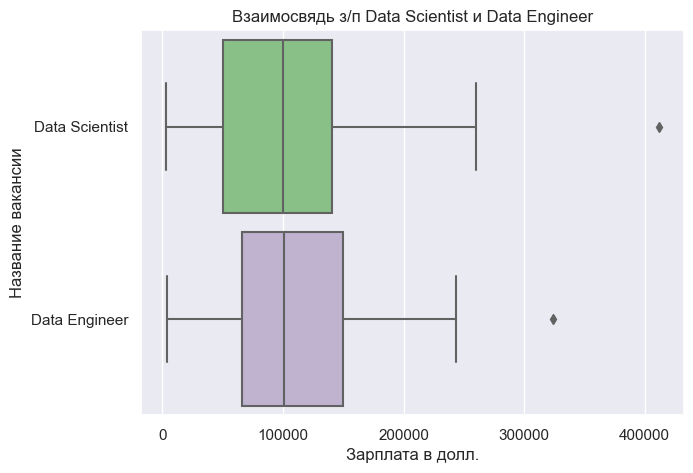

In [899]:
fig = plt.figure(figsize=(7,5))
boxplot = sns.boxplot(
    data=df,
    y='job_title',
    x='salary_in_usd',
    orient='h',
    width=0.9
)
boxplot.set_title('Взаимосвядь з/п Data Scientist и Data Engineer');
boxplot.set_xlabel('Зарплата в долл.')
boxplot.set_ylabel('Название вакансии')

На первый взгляд заработная плата Data Engineer немного превышает зарплату Data Scientist, но перед нами стоит вопрос сравнения з/ п конкретно за 2022 год

In [900]:
df_2022 = df[df['work_year'] == 2022]
salary_2022 = df_2022.groupby('job_title')['salary_in_usd'].mean().sort_values()
salary_2022

job_title
Data Engineer     124651.784810
Data Scientist    131366.938462
Name: salary_in_usd, dtype: float64

Text(0, 0.5, 'Зарплата в долл.')

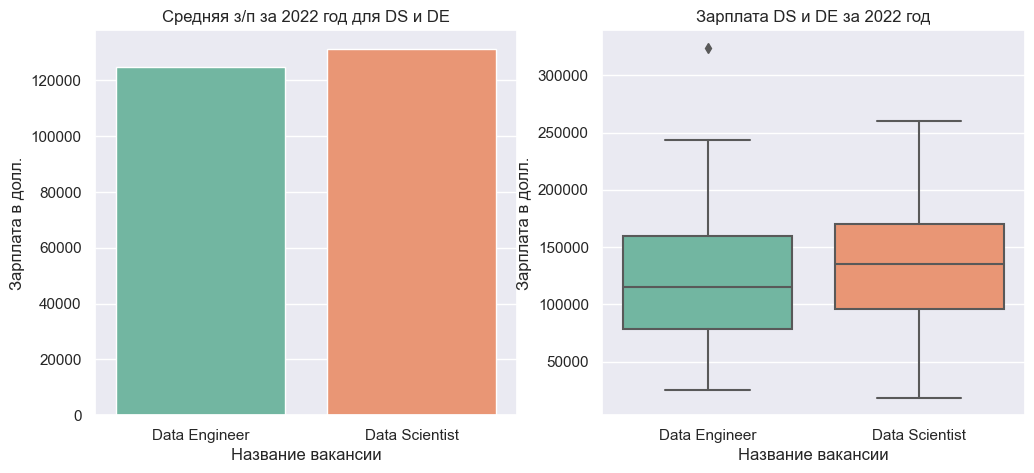

In [901]:
plt.figure(figsize=(12, 5))
sns.set_palette('Set2')

plt.subplot(1, 2, 1)
ax = sns.barplot(data=df_2022,
                 x=salary_2022.index, 
                 y=salary_2022
                 )
ax.set_title('Средняя з/п за 2022 год для DS и DE')
ax.set_xlabel('Название вакансии')
ax.set_ylabel('Зарплата в долл.')

plt.subplot(1, 2, 2)
ax = sns.boxplot(data=df_2022, 
                 x='job_title',
                 y='salary_in_usd')
ax.set_title('Зарплата DS и DE за 2022 год')
ax.set_xlabel('Название вакансии')
ax.set_ylabel('Зарплата в долл.')

In [902]:
#смотрим числовые характеристики
df_counts = df_2022.groupby('job_title')['salary_in_usd'].describe().round(2)
df_counts

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,79.0,124651.78,57846.84,25000.0,78526.0,115000.0,160040.0,324000.0
Data Scientist,65.0,131366.94,55785.24,18442.0,95550.0,135000.0,170000.0,260000.0


И числовые, и визуальные характеристики говорят нам о том, что зарплата Data Scientist (среднее - 131367 долл.) за 2022 год немного превышает зарплату Data Engineer (среднее - 124652 долл.), об этом говорят и среднее значение, и медиана, и межквартильный размах. Для того, чтобы определить, являются ли эти различия статистически значимыми далее проведем статистическое тестирование.

## Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Text(0, 0.5, 'Количество')

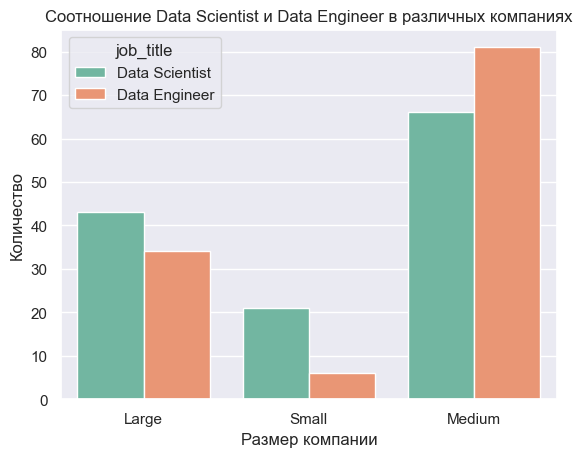

In [903]:
ax = sns.countplot(data=df,
                 x='company_size',
                 hue='job_title'
)
ax.set_title('Соотношение Data Scientist и Data Engineer в различных компаниях')
ax.set_xlabel('Размер компании')
ax.set_ylabel('Количество')

В средних компаниях преимущество у Data Engineer, в то время, как в больших и маленьких компаниях приобладают Data Scientist.

Text(47.25, 0.5, 'Размер компании')

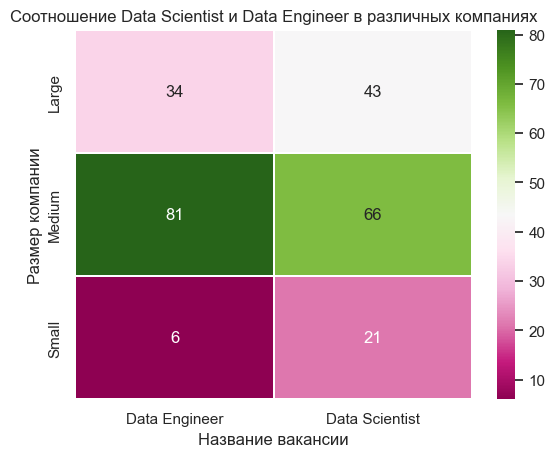

In [904]:
cross_tab = pd.crosstab(index=df['company_size'], columns=df['job_title'])
ax = sns.heatmap(data=cross_tab, annot=True, linewidths=0.3, cmap='PiYG')
ax.set_title('Соотношение Data Scientist и Data Engineer в различных компаниях')
ax.set_xlabel('Название вакансии')
ax.set_ylabel('Размер компании')

Согласно данным в средних компаниях больше Data Engineer, а в небольших и больших - Data Scientist. Чтобы определить, являются ли эти различия статистически значимыми, далее проведём статистические тесты.

## Статистический анализ данных

In [905]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер заработной платы для Data Scientist не отличается в разные года: 2020 ($μ_1$), 2021 ($μ_2$), 2022 ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: размер заработной платы для Data Scientist отличается в разные года: 2020 ($μ_1$), 2021 ($μ_2$), 2022 ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [906]:
# значения заработной платы
salary_20 = data_ds.loc[data_ds['work_year']== 2020, 'salary_in_usd']
salary_21 = data_ds.loc[data_ds['work_year']== 2021, 'salary_in_usd']
salary_22 = data_ds.loc[data_ds['work_year']== 2022, 'salary_in_usd']


# проводим тест Шапиро-Уилка
print('Для 2020 года:')
result = stats.shapiro(salary_20)
decision_normality(result[1])

print('Для 2021:')
result = stats.shapiro(salary_21)
decision_normality(result[1])

print('Для 2022:')
result = stats.shapiro(salary_22)
decision_normality(result[1])

Для 2020 года:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для 2021:
p-value = 0.107
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для 2022:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Да.
* Признак распределён по нормальному закону? — Два распределены нормально, один нет, поэтому будем применять непараметрические статистические тесты. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [907]:
# проводим тест
_, p = stats.kruskal(salary_20, salary_21, salary_22)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Размер заработной платы для Data Scientist отличается в разные года. Мы выяснили, что з/п за каждый год разнятся, но что на счет ежегодного роста? Для того, чтобы ответить на этот вопрос, сравним попарно з/п DS в разные года. Как распределены выборки мы уже знаем, поэтому переходим сразу к формулированию гипотез и выбору теста. 

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер заработной платы Data Scientist за 2020 год ($μ_1$) статистически больше либо равен размеру заработной платы за 2021 год ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер заработной платы Data Scientist за 2020 ($μ_1$) статистически меньше, чем размер заработной платы в 2021($μ_2$), т е наблюдается рост з/п.

$$ H_1 : μ_1 < μ_2$$


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Да.
* Признак распределён по нормальному закону? — Распределение выборка за 2020 год отличается от нормального, за 2021 - распределено нормально, поэтому будем применять непараметрические статистические тесты. 

Для проверки нашей гипотезы можно использовать критерий Уилкоксона.

Но проблема за ключается в том, что у нас выборки разной длины. Самый простой способ наращивания выборки  — интерполяция. Будем наращивать выборки за 2020 и 2021 года до желаемого количества наблюдений, равного 65 (длине самой длиной выборки за 2022 год)


In [908]:
import numpy as np
import matplotlib.pyplot as plt

# желаемое количество наблюдений
n = 65

# шкала по размеру желаемого кол-ва наблюдений
x = list(range(n))

# шкала по размеру имеющегося кол-ва наблюдений
xp = np.linspace(0, n-1, num=len(salary_20))

# данные и метод
fp = salary_20
salary_20_interp = np.interp(x, xp, fp)

In [909]:
import numpy as np
import matplotlib.pyplot as plt

# желаемое количество наблюдений
n = 65

# шкала по размеру желаемого кол-ва наблюдений
x = list(range(n))

# шкала по размеру имеющегося кол-ва наблюдений
xp = np.linspace(0, n-1, num=len(salary_21))

# данные и метод
fp = salary_21
salary_21_interp = np.interp(x, xp, fp)

In [910]:
# проводим тест
_, p = stats.wilcoxon(salary_20_interp, salary_21_interp, alternative = 'less')
decision_hypothesis(p)

p-value = 0.932
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Размер з/п Data Scientist за 2021 год не превышает з/за 2020 год, т е роста зарплаты не было. 


Теперь сравним з/п за 2021-22 гг.


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер заработной платы Data Scientist за 2021 год ($μ_1$) статистически больше либо равен размеру заработной платы за 2022 год ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер заработной платы Data Scientist за 2021 ($μ_1$) статистически меньше, чем размер заработной платы в 2022($μ_2$), т е наблюдается рост з/п.

$$ H_1 : μ_1 < μ_2$$

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Да.
* Признак распределён по нормальному закону? — Да

Для проверки нашей гипотезы можно использовать парный t-критерий .

**Проведём тест**

In [911]:
_, p = stats.ttest_rel(salary_21_interp, salary_22, alternative='less')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

В 2022 для DS году произошел рост зарплаты.

### Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер заработной платы для Data Scientist не отличается в зависимости от размера компании: небольшая компания ($μ_1$), средняя компания ($μ_2$), большая компания ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: размер заработной платы для Data Scientist отличается в зависимости от размера компании: небольшая компания ($μ_1$), средняя компания ($μ_2$), большая компания ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$$


In [912]:
# значения заработной платы
salary_small = data_ds.loc[data_ds['company_size']== 'Small', 'salary_in_usd']
salary_medium = data_ds.loc[data_ds['company_size']== 'Medium', 'salary_in_usd']
salary_large = data_ds.loc[data_ds['company_size']== 'Large', 'salary_in_usd']


# проводим тест Шапиро-Уилка
print('Для 2020 года:')
result = stats.shapiro(salary_small)
decision_normality(result[1])

print('Для 2021:')
result = stats.shapiro(salary_medium)
decision_normality(result[1])

print('Для 2022:')
result = stats.shapiro(salary_large)
decision_normality(result[1])

Для 2020 года:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для 2021:
p-value = 0.897
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для 2022:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Два распределены нормально, один нет, поэтому будем применять непараметрические статистические тесты. 

Для проверки нашей гипотезы используем критерий Краскела — Уоллиса.

**Проведём тест**

In [913]:
# проводим тест
_, p = stats.kruskal(salary_small, salary_medium, salary_large)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Заработная плата для Data Scientist различна в зависимости от размера компания, существует статистически значимая взаимосвязь между размером компании и з/п DS.

### Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер заработной платы Data Scientist ($μ_1$) статистически меньше либо равен размеру заработной платы Data Engineer ($μ_2$) в 2022 году.

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер заработной платы Data Scientist($μ_1$) статистически больше, чем размер заработной платы Data Engineer ($μ_2$) в 2022 году.

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [914]:
# значения з/п
salary_DS = df_2022.loc[df_2022['job_title']=='Data Scientist', 'salary_in_usd']
salary_DE = df_2022.loc[df_2022['job_title']=='Data Engineer', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для DS:')
result = stats.shapiro(salary_DS)
decision_normality(result[1])

print('Для DE:')
result = stats.shapiro(salary_DE)
decision_normality(result[1])

Для DS:
p-value = 0.676
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для DE:
p-value = 0.007
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер заработной платы»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — один - да, второй - нет, поэтому будем применять непараметрические статистические тесты. 

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов.

**Проведём тест**

In [915]:
# проводим тест
_, p = stats.mannwhitneyu(salary_DS, salary_DE, alternative='greater')
decision_hypothesis(p)

p-value = 0.160
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Нет оснований утверждать, что размер зарплаты в 2022 году для Data Scientist больше, чем у Data Engineer.

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между тем, занимает сотрудник должность Data Scientist или Data Engineer, и размером компании нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между тем, занимает сотрудник должность Data Scientist или Data Engineer, и размером компании есть взаимосвязь (признаки зависимы).

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «размер компании»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [916]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(df['company_size'], df['job_title'])

cross_table

job_title,Data Engineer,Data Scientist
company_size,,
Large,34,43
Medium,81,66
Small,6,21


In [917]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Существует статистически значимая взаимосвязь между наличием должностей Data Scientist и Data Engineer и размером компании.

## Дополнительное исследование

На протяжении всего анализа мы рассматривали только две должности Data Scientist и Data Engineer, но наука о данных обширна и представлена множеством вакансий. Давайте посмотрим на различные взаимосвязи зарплаты специалистов в более широком разрезе вакансий, и посмотрим, как оценивается их труд.

In [918]:
count_jobs = data['job_title'].value_counts()[:10]
count_jobs

Data Scientist                130
Data Engineer                 121
Data Analyst                   82
Machine Learning Engineer      39
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: job_title, dtype: int64

Text(0.5, 1.0, 'Топ 10 профессий')

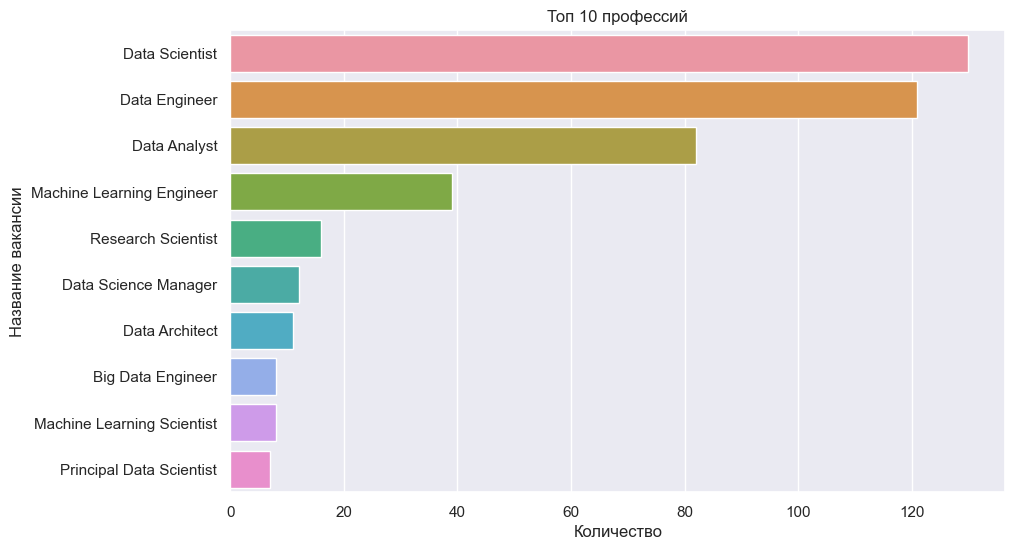

In [919]:
plt.figure(figsize=(10,6))
sns.barplot(x=count_jobs.values, 
            y=count_jobs.index, 
            orient='h')  
plt.xlabel('Количество')
plt.ylabel('Название вакансии')
plt.title('Топ 10 профессий')




Больше всего в наборе данных представлено DS и DE, с их з/п мы уже ознакомились, теперь посмотрим какая заработная плата у других.

In [920]:
top_salary = data.groupby('job_title')['salary_in_usd'].mean().nlargest(10)
top_salary

job_title
Data Analytics Lead         405000.000000
Principal Data Engineer     328333.333333
Financial Data Analyst      275000.000000
Principal Data Scientist    215242.428571
Director of Data Science    195074.000000
Data Architect              177873.909091
Applied Data Scientist      175655.000000
Analytics Engineer          175000.000000
Data Specialist             165000.000000
Head of Data                160162.600000
Name: salary_in_usd, dtype: float64

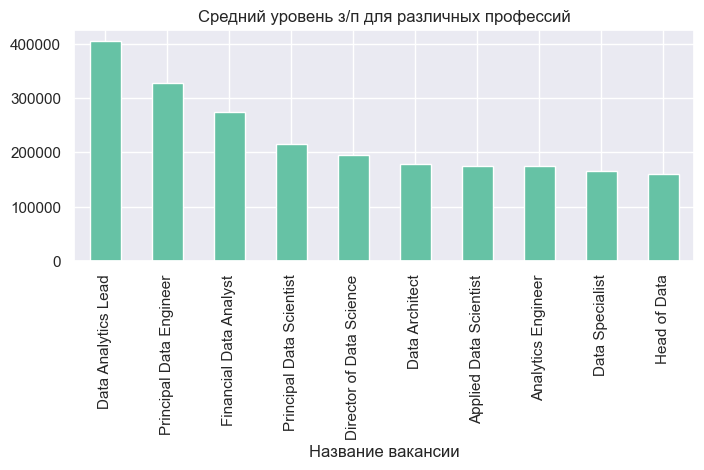

In [921]:
top_salary.plot(
    kind='bar',
    grid=True,
    figsize=(8, 3),
    title='Средний уровень з/п для различных профессий',
    xlabel='Название вакансии'
);

[Text(0, 0, 'Data Analytics Lead'),
 Text(1, 0, 'Principal Data Engineer'),
 Text(2, 0, 'Financial Data Analyst'),
 Text(3, 0, 'Principal Data Scientist'),
 Text(4, 0, 'Director of Data Science'),
 Text(5, 0, 'Data Architect'),
 Text(6, 0, 'Applied Data Scientist'),
 Text(7, 0, 'Analytics Engineer'),
 Text(8, 0, 'Data Specialist'),
 Text(9, 0, 'Head of Data')]

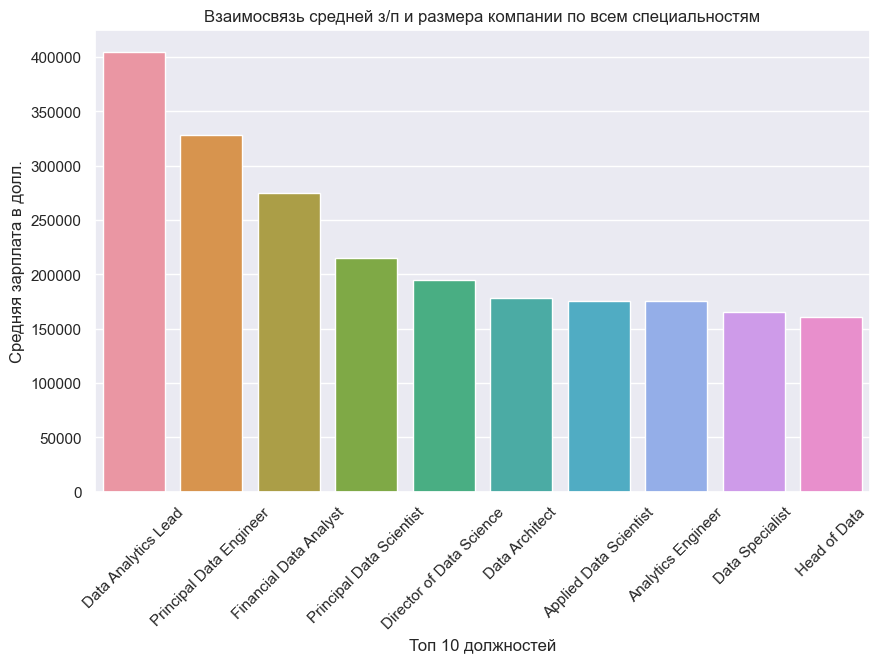

In [922]:
fig = plt.figure(figsize=(10,6))
barplot = sns.barplot(
    x=top_salary.index,
    y= top_salary.values,
    orient='v'
)
barplot.set_title('Взаимосвязь средней з/п и размера компании по всем специальностям');
barplot.set_ylabel('Средняя зарплата в долл.')
barplot.set_xlabel('Топ 10 должностей')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)

Мы видим,что самая высокая средняя зарплата у Data Analytics Lead. Любой усердый труд окупается, позия Lead высоко оплачиваемая позиция. Но мне, как начинающему специалисту интересно, какова оплата труда для новичка. Сравним з/п Data Scientist на позиции Junior с з/п Data Analyst, третьей по популярности вакансии в нашем наборе данных.

In [923]:
data_junior = data[data['experience_level'] == 'Junior']
data_junior = data_junior[(data_junior['job_title'] == 'Data Analyst') | (data_junior['job_title'] == 'Data Scientist')]

#Посмотрим какая в среднем з/п у DS и DА
salary_junior = round(data_junior.groupby('job_title')['salary_in_usd'].mean().sort_values(),2)
salary_junior

job_title
Data Analyst      53960.67
Data Scientist    55330.91
Name: salary_in_usd, dtype: float64

Text(0, 0.5, 'Зарплата в долл.')

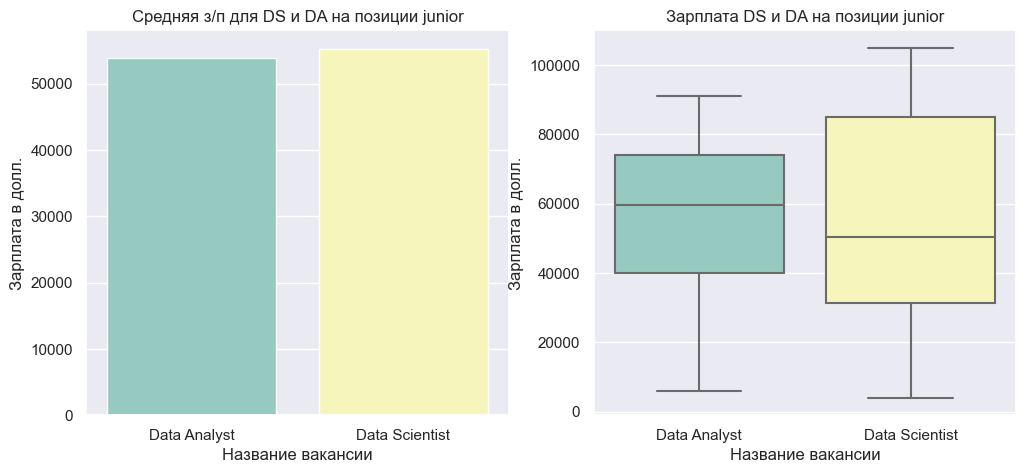

In [924]:
plt.figure(figsize=(12, 5))
sns.set_palette('Set3')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=salary_junior.index , 
                 y=salary_junior
                 )
ax.set_title('Средняя з/п для DS и DA на позиции junior')
ax.set_xlabel('Название вакансии')
ax.set_ylabel('Зарплата в долл.')

plt.subplot(1, 2, 2)
ax = sns.boxplot(data=data_junior, 
                 x='job_title',
                 y='salary_in_usd')
ax.set_title('Зарплата DS и DA на позиции junior')
ax.set_xlabel('Название вакансии')
ax.set_ylabel('Зарплата в долл.')

Получается интересно, средние значения зарплаты у этих двух профессий практически идентичны, медиана больше у Data Analyst, однако, межквартильный размах больше у Data Scientist. Предположим, что на позиции junior у DS з/п больше, чем у DA. Чтобы подтвердить или опровергнуть эту гипотезу проведем статистический тест.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер заработной платы Data Scientist junior ($μ_1$) статистически меньше либо равен размеру заработной платы junior Data Engineer ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер заработной платы Data Scientist junior ($μ_1$) статистически больше, чем размер заработной платы Data Engineer  junior($μ_2$).

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [925]:
# значения з/п
salary_ds = data_junior.loc[data_junior['job_title']=='Data Scientist', 'salary_in_usd']
salary_da = data_junior.loc[data_junior['job_title']=='Data Analyst', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для DS:')
result = stats.shapiro(salary_ds)
decision_normality(result[1])

print('Для DA:')
result = stats.shapiro(salary_da)
decision_normality(result[1])

Для DS:
p-value = 0.174
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для DA:
p-value = 0.102
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер заработной платы»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — да, поэтому будем применять параметрические статистические тесты. 

Чтобы проверить нашу гипотезу, можно использовать двухвыборочный t - критерий. Не забываем, что перед использованием этого теста необходимо установить равенство (или неравенство) дисперсий в выборках, для того, чтобы корректно установить параметр equal_var.

**Проведём тест**

In [926]:
# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(salary_ds, salary_da)
print(result)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')
    
# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(salary_ds, salary_da, alternative='greater', equal_var=True)
decision_hypothesis(p)


Тест на равенство дисперсий
LeveneResult(statistic=0.14046681577058395, pvalue=0.7102898646354705)
p-value = 0.710
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.451
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

У нас нет оснований утверждать, что зарплата на позиции Junior Data Scientist больше, чем у Junior Data Analyst.

Теперь посмотрим, какая из стран предлагает больше всего возможностей для специалистов разных направлений.

In [927]:
top_country = data['company_location'].value_counts()[:10]
top_country

United States     318
United Kingdom     46
Canada             28
Germany            27
India              24
France             15
Spain              14
Greece             10
Japan               6
Netherlands         4
Name: company_location, dtype: int64

Text(0.5, 1.0, 'Топ 10 стран')

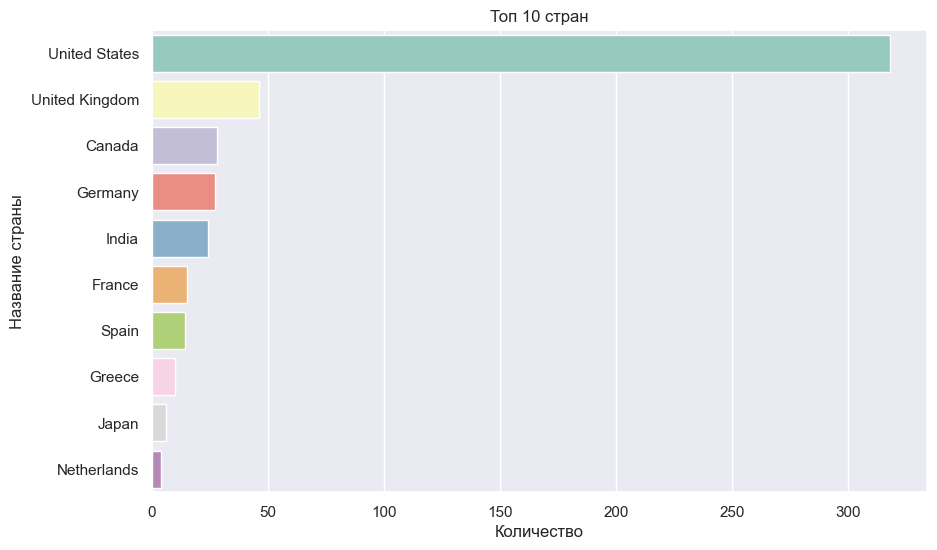

In [928]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_country.values, 
            y=top_country.index, 
            orient='h')  
plt.xlabel('Количество')
plt.ylabel('Название страны')
plt.title('Топ 10 стран')

Мы знаем, что при анализе зарплат у специалистов Data Scientist, значительную роль имел признак remote_ratio - объём работы, выполняемой удалённо. Давайте теперь посмотрим есть ли связь между этим признаком и страной работодаля - company_location. Для анализа будем рассматривать топ 10 стран, которые предлагают больше всего возможностей для специалистов.

In [ ]:
data['company_location'] = data['company_location'].apply(lambda x: x if x in top_country else 'other')
data = data[data.company_location != 'other']

[Text(0, 0, 'Germany'),
 Text(1, 0, 'Japan'),
 Text(2, 0, 'United Kingdom'),
 Text(3, 0, 'United States'),
 Text(4, 0, 'France'),
 Text(5, 0, 'India'),
 Text(6, 0, 'Greece'),
 Text(7, 0, 'Netherlands'),
 Text(8, 0, 'Canada'),
 Text(9, 0, 'Spain')]

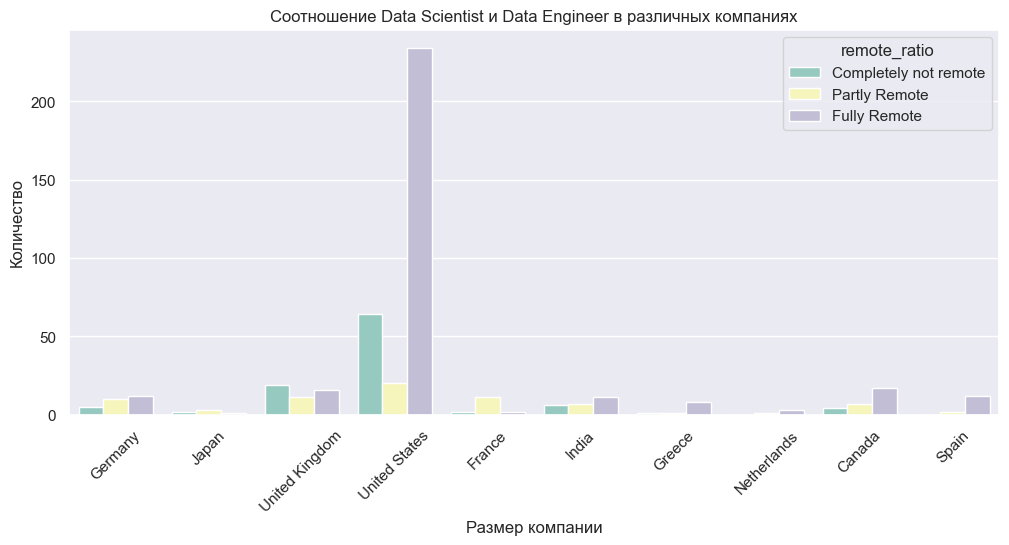

In [930]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=data,
                 x='company_location',
                 hue='remote_ratio'
)
ax.set_title('Соотношение Data Scientist и Data Engineer в различных компаниях')
ax.set_xlabel('Размер компании')
ax.set_ylabel('Количество')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)



На графике видно, что большенство стран отдают предпочтение полностью удаленной работе. Хотя есть и исключения, к примеру, Англия предпочитает все же работу на местах, в то время, как Франция - частично удаленной работе.

### Проверим есть ли взаимосвязь между этими двумя признаками.

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между признаками нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между признаками есть взаимосвязь (признаки зависимы).

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака ? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**


In [931]:
# составляем таблицу сопряжённости
cross_tab = pd.crosstab(data['company_location'], data['remote_ratio'])
cross_tab

remote_ratio,Completely not remote,Fully Remote,Partly Remote
company_location,,,
Canada,4,17,7
France,2,2,11
Germany,5,12,10
Greece,1,8,1
India,6,11,7
Japan,2,1,3
Netherlands,0,3,1
Spain,0,12,2
United Kingdom,19,16,11


In [932]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.005
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Существует статистически значимая взаимосвязь между страной работодателя и работой, выполняемой удалённо.

## Итоговые результаты исследования

*   Размер заработной платы для Data Scientist отличается в разные года, однако, нет оснований утверждать, что зарплата для Data Scientist растет каждый год, несмотря на то, что з/п в 2022 году больше, чем в 2021, но то же самое нельзя сказать на счет 2021 года по сравнению с 2020 годом. 
*   Заработная плата для Data Scientist различна в зависимости от размера компания, существует статистически значимая взаимосвязь между размером компании и з/п DS.
*   Нет оснований утверждать, что размер зарплаты в 2022 году для Data Scientist больше, чем у Data Engineer.
*   Существует статистически значимая взаимосвязь между наличием должностей Data Scientist и Data Engineer и размером компании.
* У нас нет оснований утверждать, что зарплата на позиции Junior Data Scientist больше, чем у Junior Data Analyst.
* Существует статистически значимая взаимосвязь между страной работодателя и работой, выполняемой удалённо.